# SBIN Stock-  Predict Stock Prices using Linear Regression

# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
from scipy import stats
import sklearn as sl
from sklearn.datasets import load_boston
import seaborn as sns
from sklearn import metrics

import matplotlib.pyplot as plt

import seaborn as sns


# Data load

In [2]:
df=pd.read_csv("Sbistock.csv")

In [3]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,23-01-2018,306.399994,320.549988,306.350006,318.100006,310.346680,35252217
1,24-01-2018,317.700012,331.600006,316.200012,329.899994,321.859100,38070520
2,25-01-2018,332.750000,332.750000,311.850006,313.149994,305.517334,42466150
3,29-01-2018,313.149994,316.899994,311.000000,312.100006,304.492920,23600898
4,30-01-2018,312.049988,318.850006,311.000000,313.549988,305.907562,25810404
...,...,...,...,...,...,...,...
1230,16-01-2023,603.000000,606.099976,600.599976,603.000000,603.000000,5483191
1231,17-01-2023,603.000000,606.000000,586.049988,592.950012,592.950012,13461999
1232,18-01-2023,595.900024,597.150024,587.599976,591.450012,591.450012,11538075
1233,19-01-2023,591.000000,591.750000,587.549988,589.849976,589.849976,7475688


# Dataset

In [4]:
df.head(40)

,Date,Open,High,Low,Close,Adj Close,Volume
0,23-01-2018,306.399994,320.549988,306.350006,318.100006,310.346680,35252217
1,24-01-2018,317.700012,331.600006,316.200012,329.899994,321.859100,38070520
2,25-01-2018,332.750000,332.750000,311.850006,313.149994,305.517334,42466150
3,29-01-2018,313.149994,316.899994,311.000000,312.100006,304.492920,23600898
4,30-01-2018,312.049988,318.850006,311.000000,313.549988,305.907562,25810404
5,31-01-2018,313.000000,316.600006,307.850006,313.250000,305.614899,16409938
6,01-02-2018,316.899994,317.399994,305.000000,306.049988,298.590393,19515991
7,02-02-2018,302.899994,305.750000,295.500000,297.350006,290.102448,23274673
8,05-02-2018,292.649994,300.399994,290.000000,298.049988,290.785370,18940578
9,06-02-2018,285.000000,297.299988,282.899994,291.750000,284.638947,30577218


In [5]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
1230,16-01-2023,603.000000,606.099976,600.599976,603.000000,603.000000,5483191
1231,17-01-2023,603.000000,606.000000,586.049988,592.950012,592.950012,13461999
1232,18-01-2023,595.900024,597.150024,587.599976,591.450012,591.450012,11538075
1233,19-01-2023,591.000000,591.750000,587.549988,589.849976,589.849976,7475688
1234,20-01-2023,593.799988,596.599976,590.799988,592.200012,592.200012,6750607


In [6]:
df.shape

(1235, 7)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1235 entries, 0 to 1234
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1235 non-null   object 
 1   Open       1235 non-null   float64
 2   High       1235 non-null   float64
 3   Low        1235 non-null   float64
 4   Close      1235 non-null   float64
 5   Adj Close  1235 non-null   float64
 6   Volume     1235 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 67.7+ KB


In [8]:
df.isna().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [9]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [10]:
df[df.duplicated()]

,Date,Open,High,Low,Close,Adj Close,Volume


In [11]:
df.duplicated().sum()

0

# Describe the mean ,std,... of Numerical columns

In [12]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1235.000000,1235.000000,1235.000000,1235.000000,1235.000000,1.235000e+03
mean,352.850446,357.466478,347.792793,352.536559,346.566569,3.236091e+07
std,119.221948,119.978945,118.487661,119.277664,120.192497,2.546596e+07
min,151.949997,153.199997,149.449997,150.850006,147.173218,3.312160e+06
25%,267.700012,271.375000,262.774994,267.675003,261.150741,1.531607e+07
50%,316.049988,321.450012,311.850006,316.450012,308.736908,2.343183e+07
75%,455.000000,462.399994,448.800003,454.324997,450.051452,4.193135e+07
max,625.549988,629.549988,617.500000,625.500000,625.500000,2.149557e+08


In [13]:
df. columns. values

array(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'],
      dtype=object)

In [14]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,23-01-2018,306.399994,320.549988,306.350006,318.100006,310.346680,35252217
1,24-01-2018,317.700012,331.600006,316.200012,329.899994,321.859100,38070520
2,25-01-2018,332.750000,332.750000,311.850006,313.149994,305.517334,42466150
3,29-01-2018,313.149994,316.899994,311.000000,312.100006,304.492920,23600898
4,30-01-2018,312.049988,318.850006,311.000000,313.549988,305.907562,25810404
...,...,...,...,...,...,...,...
1230,16-01-2023,603.000000,606.099976,600.599976,603.000000,603.000000,5483191
1231,17-01-2023,603.000000,606.000000,586.049988,592.950012,592.950012,13461999
1232,18-01-2023,595.900024,597.150024,587.599976,591.450012,591.450012,11538075
1233,19-01-2023,591.000000,591.750000,587.549988,589.849976,589.849976,7475688


# Data Visualization

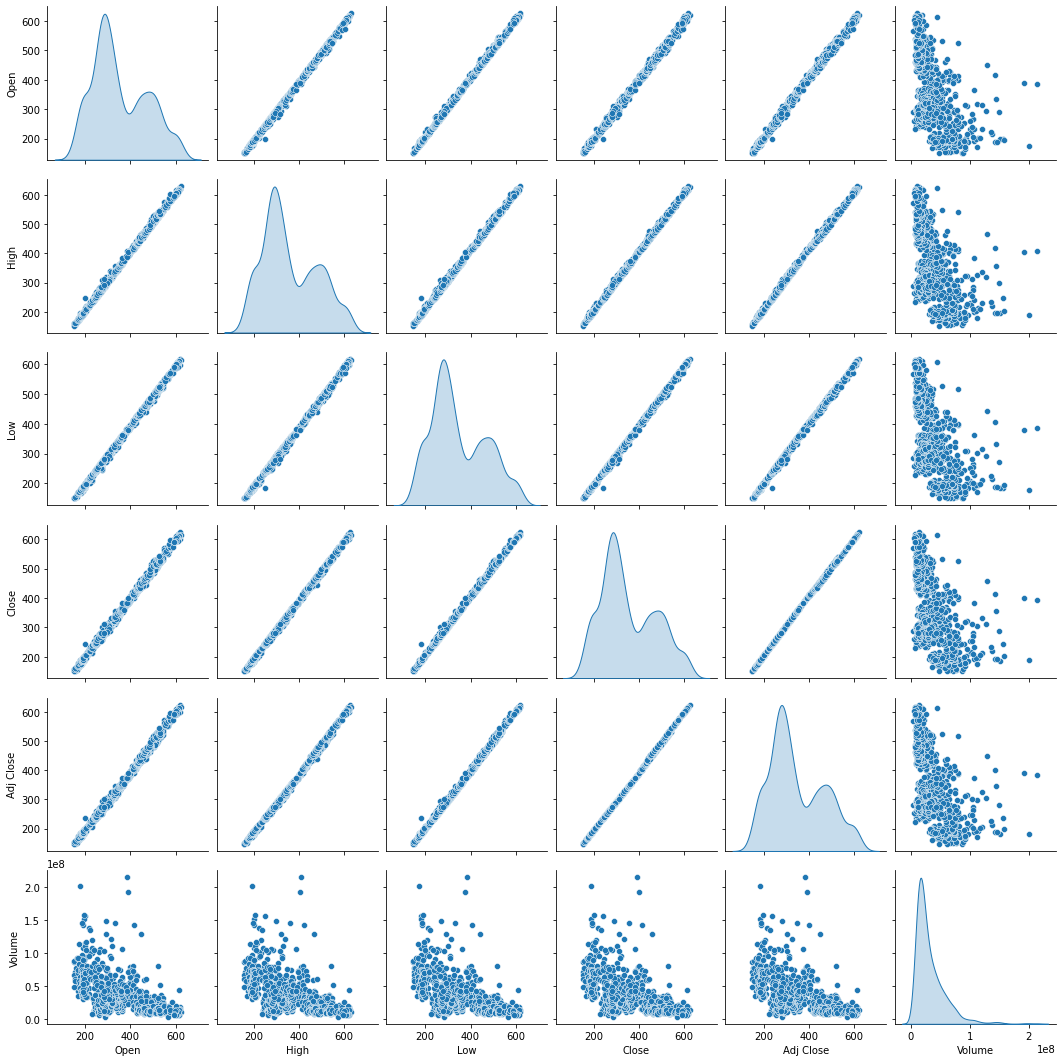

In [15]:
sns.pairplot(data=df,diag_kind='kde')
plt.savefig("1.png")

In [16]:
# Create a list for numerical columns that are to be visualized
features = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']

C:\Users\ankit\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ankit\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ankit\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

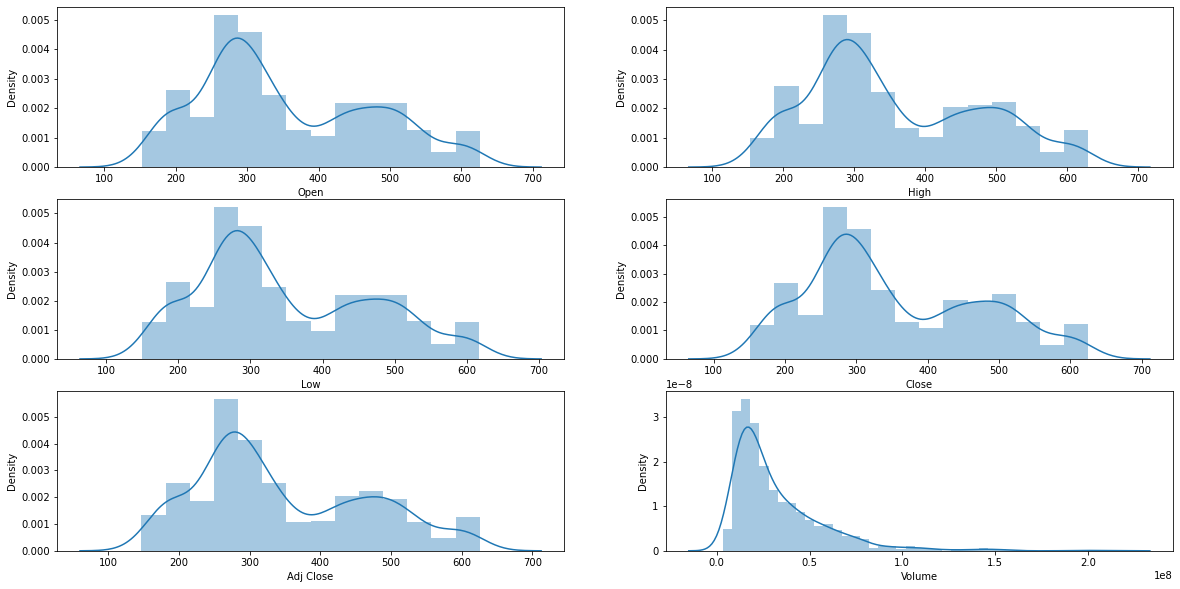

In [17]:
# Visualize the spread and skweness through the distribution plot
 
plt.subplots(figsize=(20,10))
for i, col in enumerate(features):
   plt.subplot(3,2,i+1)
   sns.distplot(df[col])
plt.show()

array([[<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>],
       [<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>],
       [<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>],
       [<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>]],
      dtype=object)

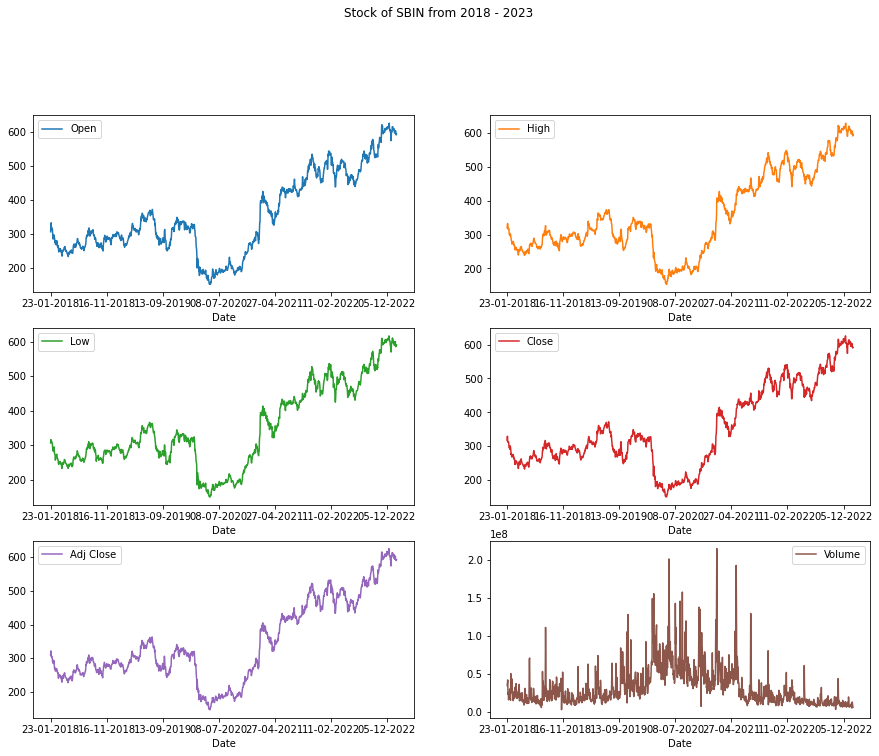

In [18]:
# Plot to view the same
df.plot(x = 'Date', y = features , subplots = True, layout = (4, 2), figsize = (15, 15), sharex = False, title = "Stock of SBIN from 2018 - 2023")

# checking correlation

In [19]:
df.corr()

,Open,High,Low,Close,Adj Close,Volume
Open,1.000000,0.999281,0.999300,0.998510,0.998322,-0.473926
High,0.999281,1.000000,0.999105,0.999427,0.999170,-0.460855
Low,0.999300,0.999105,1.000000,0.999316,0.999187,-0.481295
Close,0.998510,0.999427,0.999316,1.000000,0.999784,-0.468652
Adj Close,0.998322,0.999170,0.999187,0.999784,1.000000,-0.468804
Volume,-0.473926,-0.460855,-0.481295,-0.468652,-0.468804,1.000000


Text(0.5, 1.0, 'Heatmap')

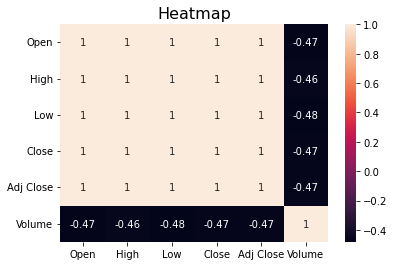

In [20]:
sns.heatmap(df.corr(),annot=True)
plt.title("Heatmap",fontsize=16)

# Ploting stock  price with respect of time

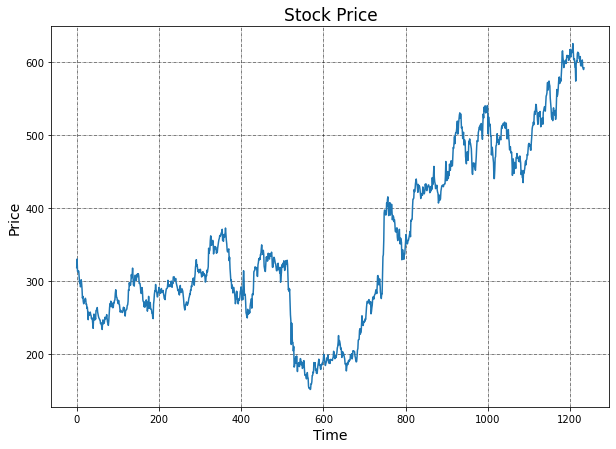

In [21]:
df['Close'].plot(figsize=(10, 7))
plt.title("Stock Price", fontsize=17)
plt.ylabel('Price', fontsize=14)
plt.xlabel('Time', fontsize=14)
plt.grid(which="major", color='k', linestyle='-.', linewidth=0.5)
plt.show()

In [22]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,23-01-2018,306.399994,320.549988,306.350006,318.100006,310.346680,35252217
1,24-01-2018,317.700012,331.600006,316.200012,329.899994,321.859100,38070520
2,25-01-2018,332.750000,332.750000,311.850006,313.149994,305.517334,42466150
3,29-01-2018,313.149994,316.899994,311.000000,312.100006,304.492920,23600898
4,30-01-2018,312.049988,318.850006,311.000000,313.549988,305.907562,25810404


# Now taking Close and Open

In [23]:
X=df['Close']
Y=df['Open']
X=pd.DataFrame(X)
Y=pd.DataFrame(Y)

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.50, random_state=101)
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [25]:
test_predictions = model.predict(X_test)

In [26]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
MAE = mean_absolute_error(y_test,test_predictions)
MSE = mean_squared_error(y_test,test_predictions)
RMSE = np.sqrt(MSE)
print("MAE",MAE)
print("MSE",MSE)
print("RMSE",RMSE)
print("beta1=",model.coef_)
print("beta0=",model.intercept_)
co=model.score(X_test,y_test)
print("Accuracy =",model.score(X_test,y_test))

MAE 4.953120278589664
MSE 44.488266961361965
RMSE 6.669952545660424
beta1= [[0.99823138]]
beta0= [0.52552826]
Accuracy = 0.9967864332729847


<AxesSubplot:xlabel='Close', ylabel='Open'>

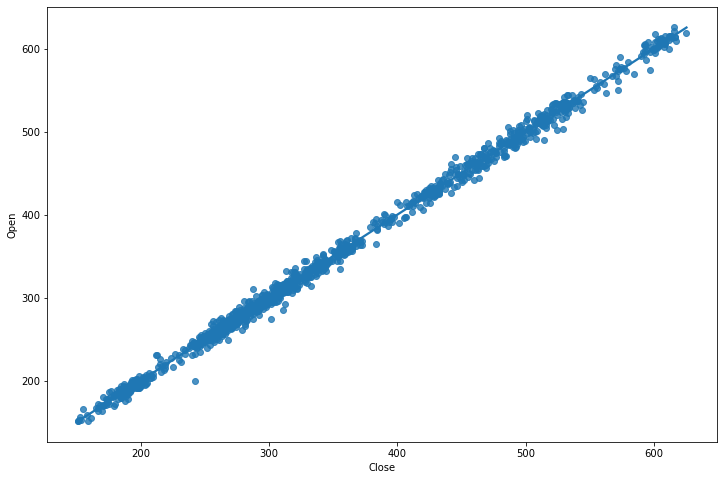

In [27]:
plt.figure(figsize=(12, 8))
sns.regplot(x=X,y=Y, data=df)

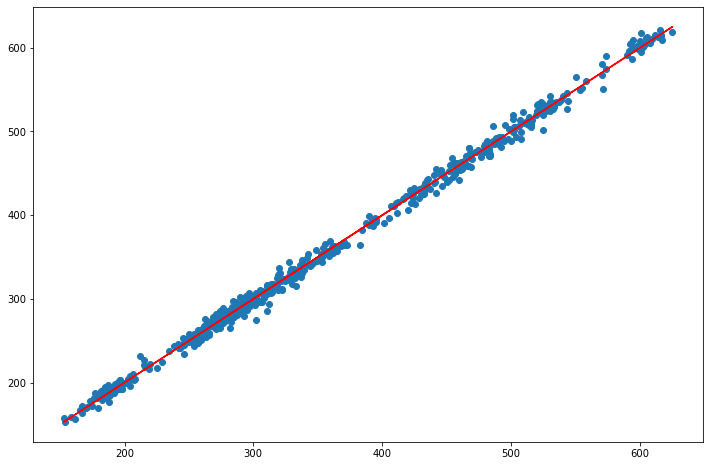

In [28]:
plt.figure(figsize=(12, 8))
plt.scatter(X_train, y_train)
plt.plot(X_train, 0.52552826+0.99823138*X_train,'r')

plt.show()

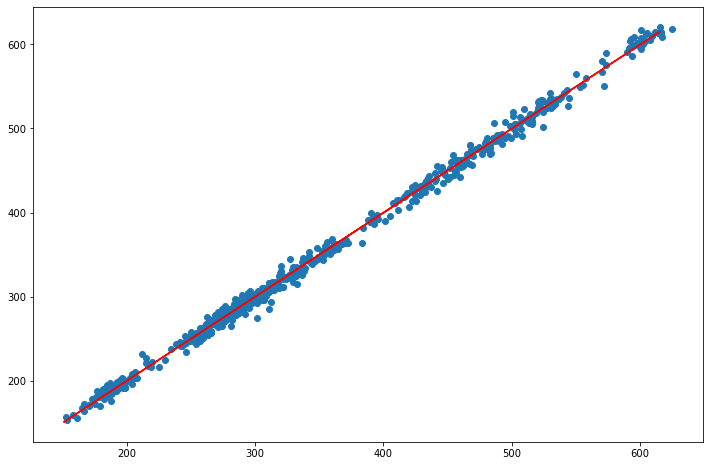

In [29]:

plt.figure(figsize=(12, 8))
plt.scatter(X_train, y_train)
plt.plot(X_test,test_predictions,'r')

plt.show()

# Now taking Open and High

In [30]:
X=df['Open']
Y=df['High']
X=pd.DataFrame(X)
Y=pd.DataFrame(Y)

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.50, random_state=101)
model.fit(X_train,y_train)
test_predictions = model.predict(X_test)

In [32]:
MAE = mean_absolute_error(y_test,test_predictions)
MSE = mean_squared_error(y_test,test_predictions)
RMSE = np.sqrt(MSE)
print("MAE",MAE)
print("MSE",MSE)
print("RMSE",RMSE)
print("beta1=",model.coef_)
print("beta0=",model.intercept_)
oh=model.score(X_test,y_test)
print("Accuracy =",model.score(X_test,y_test))

MAE 3.16987040406652
MSE 20.0454833922799
RMSE 4.4772182649810475
beta1= [[1.0044893]]
beta0= [3.20730488]
Accuracy = 0.9985735770276923


<AxesSubplot:xlabel='Open', ylabel='High'>

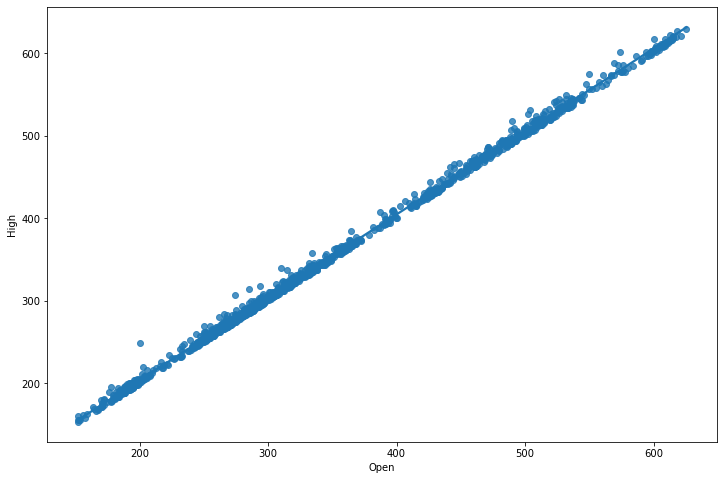

In [33]:
plt.figure(figsize=(12, 8))
sns.regplot(x=X,y=Y, data=df)

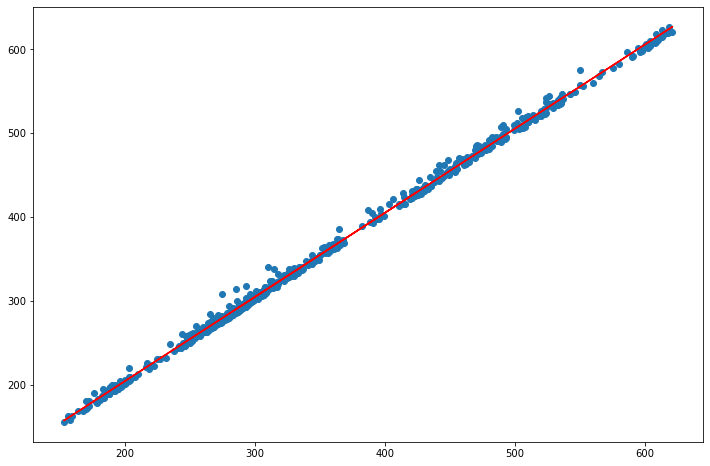

In [34]:
plt.figure(figsize=(12, 8))
plt.scatter(X_train, y_train)
plt.plot(X_train, 3.20730488+1.0044893*X_train,'r')

plt.show()

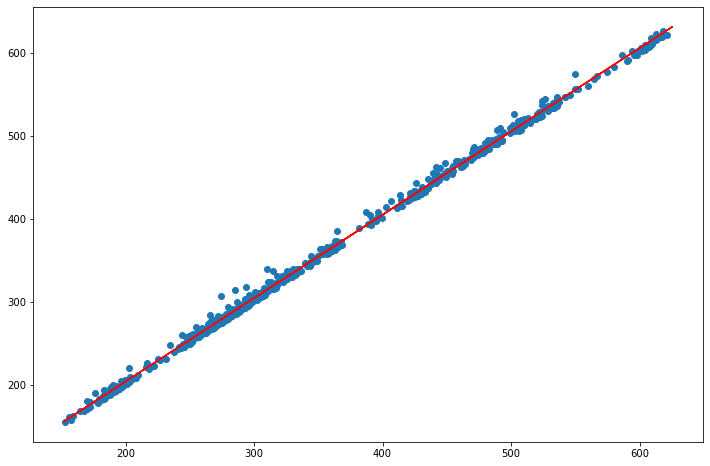

In [35]:

plt.figure(figsize=(12, 8))
plt.scatter(X_train, y_train)
plt.plot(X_test,test_predictions,'r')

plt.show()

# Now taking High and Low

In [36]:
X=df['High']
Y=df['Low']
X=pd.DataFrame(X)
Y=pd.DataFrame(Y)

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.50, random_state=101)
model.fit(X_train,y_train)
test_predictions = model.predict(X_test)

In [38]:
MAE = mean_absolute_error(y_test,test_predictions)
MSE = mean_squared_error(y_test,test_predictions)
RMSE = np.sqrt(MSE)
print("MAE",MAE)
print("MSE",MSE)
print("RMSE",RMSE)
print("beta1=",model.coef_)
print("beta0=",model.intercept_)
hl=model.score(X_test,y_test)
print("Accuracy =",model.score(X_test,y_test))

MAE 3.4646157348510296
MSE 25.54399276663424
RMSE 5.054106525058039
beta1= [[0.98705382]]
beta0= [-5.09955324]
Accuracy = 0.9981349680741809


<AxesSubplot:xlabel='High', ylabel='Low'>

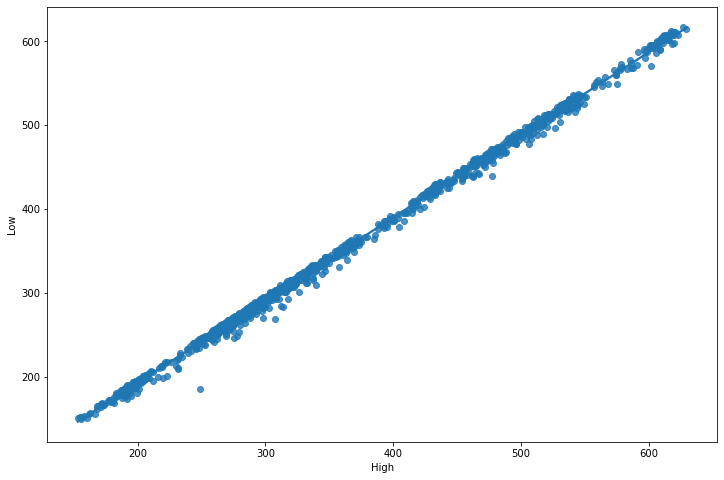

In [39]:
plt.figure(figsize=(12, 8))
sns.regplot(x=X,y=Y, data=df)

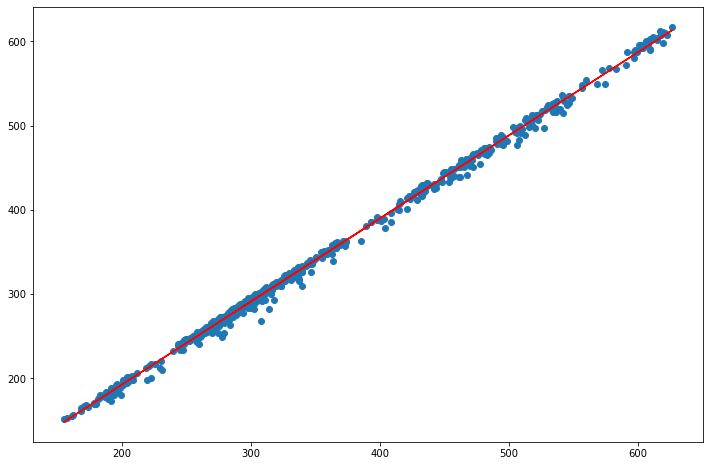

In [40]:
plt.figure(figsize=(12, 8))
plt.scatter(X_train, y_train)
plt.plot(X_train, -5.09955324+0.98705382*X_train,'r')

plt.show()

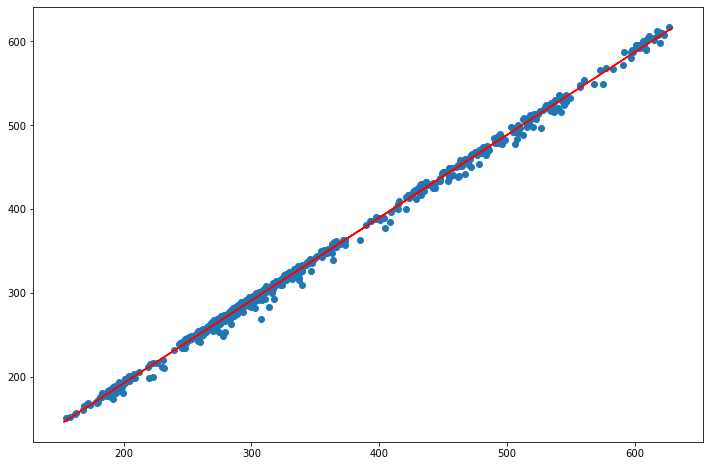

In [41]:

plt.figure(figsize=(12, 8))
plt.scatter(X_train, y_train)
plt.plot(X_test,test_predictions,'r')

plt.show()

# Now taking High and Close

In [42]:
X=df['High']
Y=df['Close']
X=pd.DataFrame(X)
Y=pd.DataFrame(Y)

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.50, random_state=101)
model.fit(X_train,y_train)
test_predictions = model.predict(X_test)

In [44]:
MAE = mean_absolute_error(y_test,test_predictions)
MSE = mean_squared_error(y_test,test_predictions)
RMSE = np.sqrt(MSE)
print("MAE",MAE)
print("MSE",MSE)
print("RMSE",RMSE)
print("beta1=",model.coef_)
print("beta0=",model.intercept_)
hc=model.score(X_test,y_test)
print("Accuracy =",model.score(X_test,y_test))

MAE 3.036273686406757
MSE 17.179327444315586
RMSE 4.144795223447787
beta1= [[0.99465216]]
beta0= [-2.77919547]
Accuracy = 0.9987603785550483


<AxesSubplot:xlabel='High', ylabel='Close'>

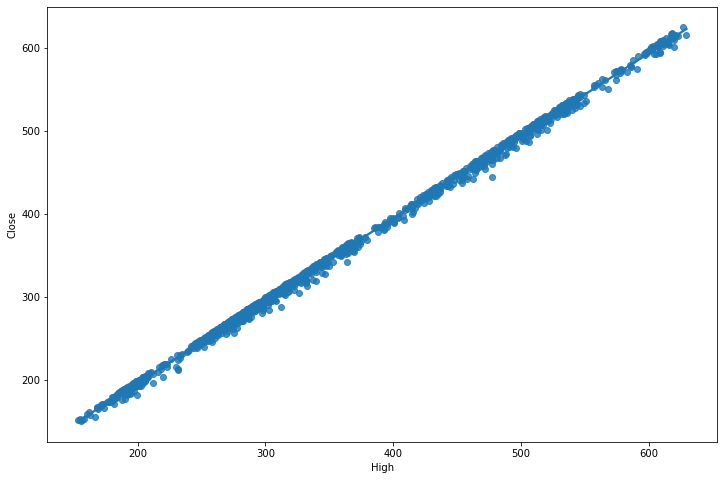

In [45]:
plt.figure(figsize=(12, 8))
sns.regplot(x=X,y=Y, data=df)

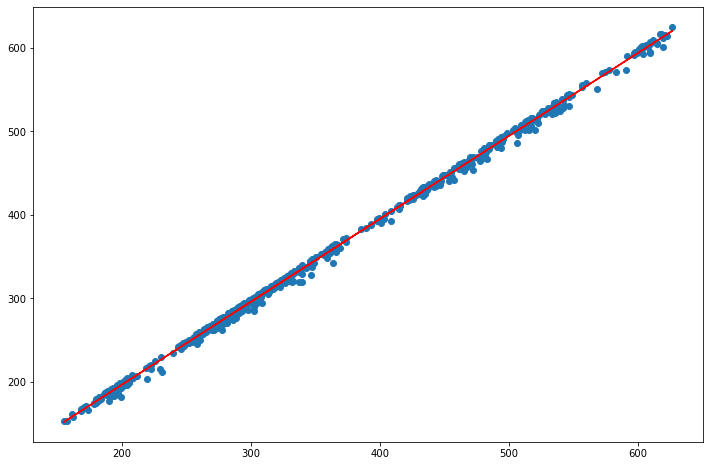

In [46]:
plt.figure(figsize=(12, 8))
plt.scatter(X_train, y_train)
plt.plot(X_train, -2.77919547+0.99465216*X_train,'r')

plt.show()

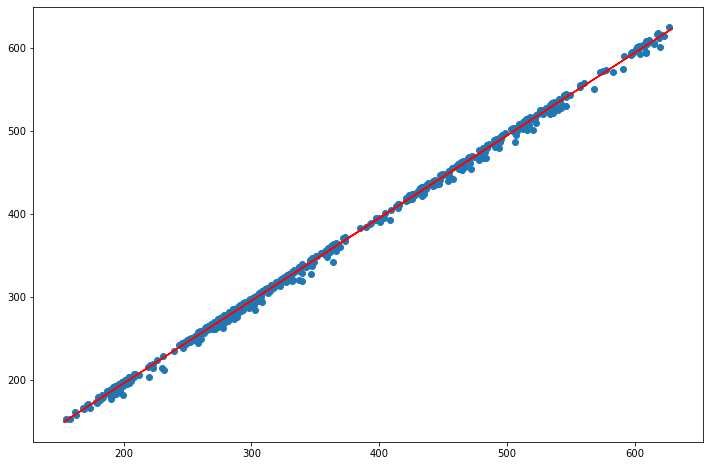

In [47]:

plt.figure(figsize=(12, 8))
plt.scatter(X_train, y_train)
plt.plot(X_test,test_predictions,'r')

plt.show()

# Now taking Open and Low

In [48]:
X=df['Open']
Y=df['Low']
X=pd.DataFrame(X)
Y=pd.DataFrame(Y)

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.50, random_state=101)
model.fit(X_train,y_train)
test_predictions = model.predict(X_test)

In [50]:
MAE = mean_absolute_error(y_test,test_predictions)
MSE = mean_squared_error(y_test,test_predictions)
RMSE = np.sqrt(MSE)
print("MAE",MAE)
print("MSE",MSE)
print("RMSE",RMSE)
print("beta1=",model.coef_)
print("beta0=",model.intercept_)
ol=model.score(X_test,y_test)
print("Accuracy =",model.score(X_test,y_test))

MAE 3.3289943320680315
MSE 21.23858567005951
RMSE 4.608534004437801
beta1= [[0.9924347]]
beta0= [-2.26917393]
Accuracy = 0.9984493168043155


<AxesSubplot:xlabel='Open', ylabel='Low'>

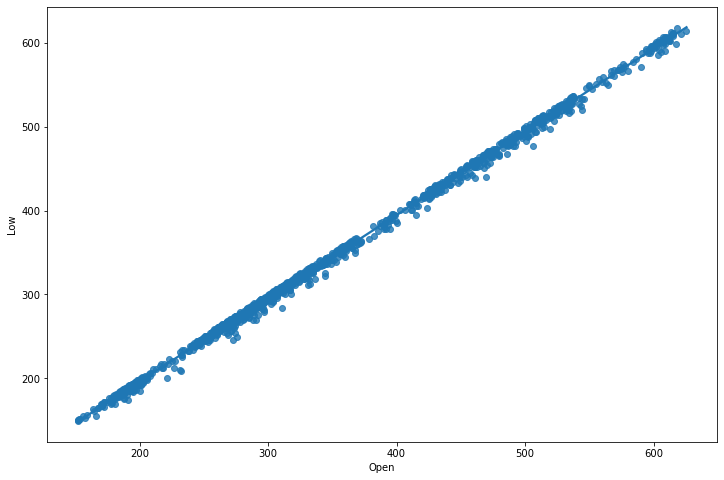

In [51]:
plt.figure(figsize=(12, 8))
sns.regplot(x=X,y=Y, data=df)

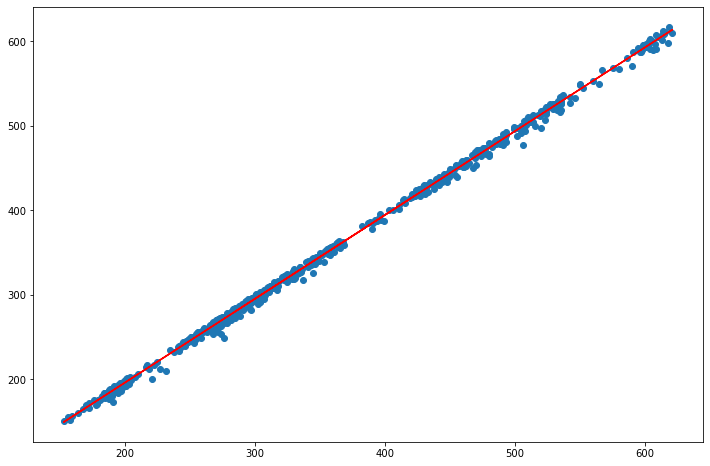

In [52]:
plt.figure(figsize=(12, 8))
plt.scatter(X_train, y_train)
plt.plot(X_train, -2.26917393+0.9924347*X_train,'r')

plt.show()

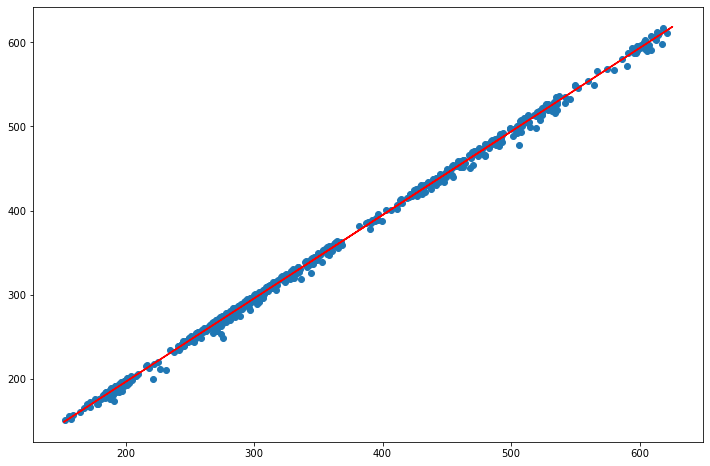

In [53]:
plt.figure(figsize=(12, 8))
plt.scatter(X_train, y_train)
plt.plot(X_test,test_predictions,'r')
plt.show()

# Now taking Low and Close

In [54]:
X=df['Low']
Y=df['Close']
X=pd.DataFrame(X)
Y=pd.DataFrame(Y)

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.50, random_state=101)
model.fit(X_train,y_train)
test_predictions = model.predict(X_test)

In [56]:
MAE = mean_absolute_error(y_test,test_predictions)
MSE = mean_squared_error(y_test,test_predictions)
RMSE = np.sqrt(MSE)
print("MAE",MAE)
print("MSE",MSE)
print("RMSE",RMSE)
print("beta1=",model.coef_)
print("beta0=",model.intercept_)
lc=model.score(X_test,y_test)
print("Accuracy =",model.score(X_test,y_test))

MAE 3.066294635643344
MSE 19.286732964730952
RMSE 4.391666308445002
beta1= [[1.00668715]]
beta0= [2.71162075]
Accuracy = 0.9986083129352047


<AxesSubplot:xlabel='Low', ylabel='Close'>

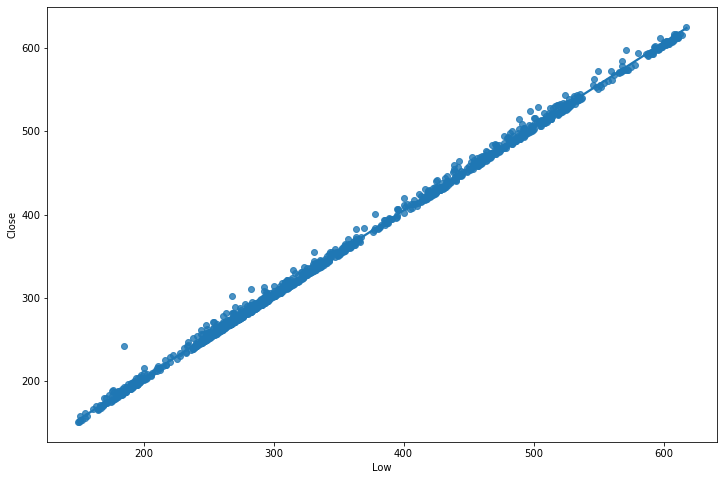

In [57]:
plt.figure(figsize=(12, 8))
sns.regplot(x=X,y=Y, data=df)

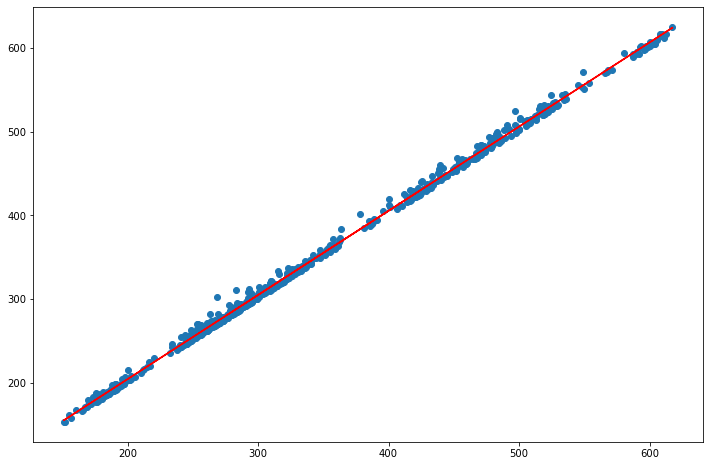

In [58]:
plt.figure(figsize=(12, 8))
plt.scatter(X_train, y_train)
plt.plot(X_train, 2.71162075+1.00668715*X_train,'r')

plt.show()

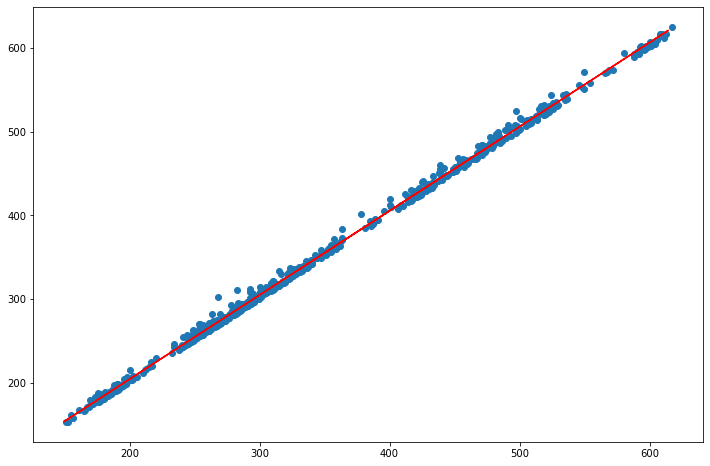

In [59]:
plt.figure(figsize=(12, 8))
plt.scatter(X_train, y_train)
plt.plot(X_test,test_predictions,'r')
plt.show()

 # from the above we conclude that High and Close gives the best prediction 

In [60]:

print("predictive accuracy of close and open in simple linear regression is ",co)
print("predictive accuracy of open and high in simple linear regression is ",oh)
print("predictive accuracy of high and low in simple linear regression is ",hl)
print("predictive accuracy of high and close in simple linear regression is ",hc)
print("predictive accuracy of open and low in simple linear regression is ",ol)
print("predictive accuracy of low and close in simple linear regression is ",lc)

predictive accuracy of close and open in simple linear regression is  0.9967864332729847
predictive accuracy of open and high in simple linear regression is  0.9985735770276923
predictive accuracy of high and low in simple linear regression is  0.9981349680741809
predictive accuracy of high and close in simple linear regression is  0.9987603785550483
predictive accuracy of open and low in simple linear regression is  0.9984493168043155
predictive accuracy of low and close in simple linear regression is  0.9986083129352047


# Report and all answer to questions are given above

# We will select High and Close  for simple linear regression  because it gives the best result with acuracy about 99.87%  BUT this may not be true because I have not removed the outlies of this data set as it was not said to do that.

# Also all the report on statistical inferences from data and model results are given alone the output such as regarding ERRORs 